# Diamonds Price Prediction Project

### Importing relevant libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Relevant information

#### Files

- data.csv: training set
- test.csv: test set
- sample_submission.csv: sample submission

#### Features

- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

### Importing the training csv

In [2]:
#Importing the csv to Jupyter Notebook
training_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_train.csv")
training_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [3]:
#Checking the shape of the dataframe
training_df.shape

(40345, 11)

In [4]:
#Checking if there are missing values
training_df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
# set the id column as index
training_df.set_index('id', inplace=True)

In [6]:
training_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [7]:
#Check what are the values that could be 
for col in training_df.columns:
    print(f"**** {col} **** --> {training_df[col].unique()[0:10]}")

**** carat **** --> [0.78 0.31 0.3  1.04 0.65 0.9  0.71 2.05 1.1  1.19]
**** cut **** --> ['Premium' 'Ideal' 'Very Good' 'Fair' 'Good']
**** color **** --> ['F' 'D' 'E' 'J' 'H' 'I' 'G']
**** clarity **** --> ['VS1' 'SI1' 'VVS2' 'SI2' 'VS2' 'IF' 'VVS1' 'I1']
**** depth **** --> [61.5 60.8 62.3 62.  61.4 62.2 64.6 62.4 61.3 59.9]
**** table **** --> [58. 56. 54. 55. 60. 59. 57. 61. 52. 53.]
**** x **** --> [5.93 4.37 4.3  6.54 5.58 6.15 4.34 5.62 8.17 6.64]
**** y **** --> [5.98 4.32 4.34 6.46 5.62 6.19 4.36 5.59 8.09 6.71]
**** z **** --> [3.66 2.64 2.69 4.03 3.44 3.84 2.71 3.62 5.08 4.09]
**** price **** --> [ 3446   732   475  9552  1276  3662   446  2902 18193  4791]


### CONCLUSIONES

Después de ver los valores únicos de cada una de las columnas, se procederá como :

- Columna *'cut'*: Cada valor tiene una importancia, por lo que se va a proceder a reemplazar los valores por números.

- Columna *'color'*: A priori, ningún color tiene más importancia que otro, por lo que se usará la función get_dummies para conseguir que todos los valores tengan la misma importancia.

- Columna *'clarity'*: Cada valor tiene una importancia, por lo que se va a proceder a reemplazar los valores por números.

#### Columna *'cut'*

In [8]:
# List of values from 'cut' column
cuts_column=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [9]:
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(cuts_column):
    print(f"The value '{y}' now is {x}")
    training_df['cut'] = training_df['cut'].replace(y, x)

The value 'Fair' now is 0
The value 'Good' now is 1
The value 'Very Good' now is 2
The value 'Premium' now is 3
The value 'Ideal' now is 4


In [10]:
training_df['cut'].unique()

array([3, 4, 2, 0, 1])

#### Columna *'clarity'*

In [11]:
# List of values from 'clarity' column
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
clarity_column = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [12]:
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(clarity_column):
    print(f"The value '{y}' now is {x}")
    training_df['clarity'] = training_df['clarity'].replace(y, x)

The value 'I1' now is 0
The value 'SI2' now is 1
The value 'SI1' now is 2
The value 'VS2' now is 3
The value 'VS1' now is 4
The value 'VVS2' now is 5
The value 'VVS1' now is 6
The value 'IF' now is 7


In [13]:
training_df['clarity'].unique()

array([4, 2, 5, 1, 3, 7, 6, 0])

#### Columna *'color'*

In [14]:
# Replacing all the values in order to get the importance for each value 
color_column = ['J','I','H','G','F','E','D']

In [15]:
for x,y in enumerate(color_column):
    print(f"The value '{y}' now is {x}")
    training_df['color'] = training_df['color'].replace(y, x)

The value 'J' now is 0
The value 'I' now is 1
The value 'H' now is 2
The value 'G' now is 3
The value 'F' now is 4
The value 'E' now is 5
The value 'D' now is 6


In [16]:
training_df['color'].unique()

array([4, 6, 5, 0, 2, 1, 3])

In [17]:
training_df.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.78,3,4,4,61.5,58.0,5.93,5.98,3.66,3446
1,0.31,4,6,2,60.8,56.0,4.37,4.32,2.64,732
2,0.30,4,4,2,62.3,54.0,4.30,4.34,2.69,475


## Cuáles son las columnas con más relación?

In [18]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
corr = training_df.corr()

In [20]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

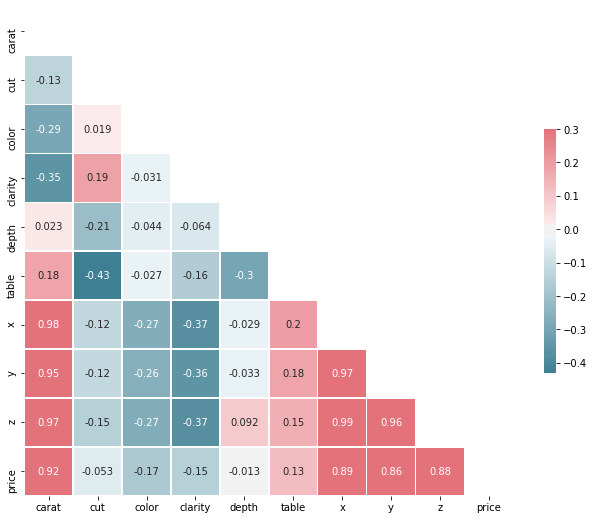

In [21]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

## Normalizing and Standardizing the data

In [22]:
# Original Data
X = training_df.drop(columns=["price"])
y = training_df['price']

In [23]:
# Standarized & Normalized "X"
pipeline = [StandardScaler(),Normalizer()]
tr = make_pipeline(*pipeline)
Xpr = tr.fit_transform(X)
Xpr = pd.DataFrame(Xpr,columns = X.columns)

In [24]:
'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)'''

X_train, X_test, y_train, y_test = train_test_split(Xpr, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 9) (8069, 9) (32276,) (8069,)


In [25]:
result = pd.concat([Xpr, y], axis=1, sort=False)

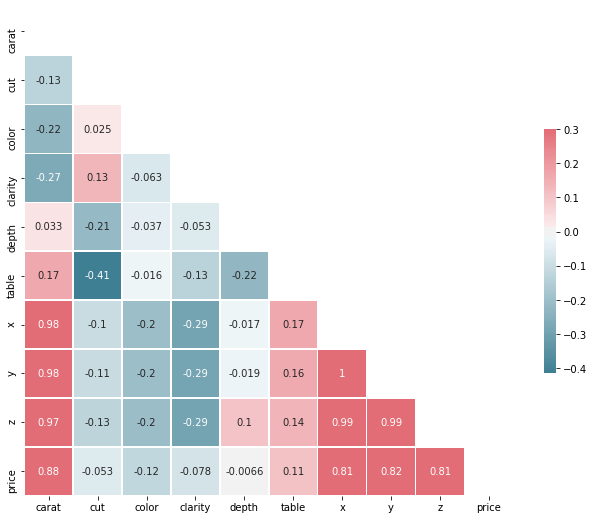

In [26]:
corr = result.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

## Using the selector

In order to check if the relevant columns are the same:

####  Model analyzing

In [27]:
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_leaf=2, random_state=111)
selector = RFECV(rf_reg, step=1, cv=5)

In [28]:
X_training = result[['carat','cut','color','clarity','y']]
y_training = result['price']

In [29]:
selector.fit(X_training, y_training)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=15,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=2, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=300, n_jobs=None,
                                      oob_score=False, random_state=111,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [30]:
selector.n_features_

5

In [31]:
pd.Series(X_training.columns)[selector.support_.tolist()]

0      carat
1        cut
2      color
3    clarity
4          y
dtype: object

####  Model training

In [32]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_training, y_training, test_size=0.2, random_state=42)

In [33]:
rf_reg.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=111, verbose=0, warm_start=False)

In [34]:
rf_reg.feature_importances_

array([0.83854823, 0.00720672, 0.03554051, 0.06702182, 0.05168271])

In [35]:
print(rf_reg.score(X_train1, y_train1))
print(rf_reg.score(X_test1, y_test1))

0.9929155887912706
0.9760560055766672


In [36]:
print('*** METRIC SUMMARY ***')
print('MSE', mean_squared_error(y_test1, rf_reg.predict(X_test1)))
print('RMSE', np.sqrt(mean_squared_error(y_test1, rf_reg.predict(X_test1))))
print('MSLE', mean_squared_log_error(y_test1, rf_reg.predict(X_test1)))
print('MAE', mean_absolute_error(y_test1, rf_reg.predict(X_test1)))
print('R2', r2_score(y_test1, rf_reg.predict(X_test1)))

*** METRIC SUMMARY ***
MSE 375169.5855287016
RMSE 612.5108860491392
MSLE 0.015523782511630523
MAE 314.8997344299986
R2 0.9760560055766672


# TEST PART

In [35]:
#Importing the csv to Jupyter Notebook
test_df = pd.read_csv("../input/diamonds-datamad0120/diamonds_test.csv")
test_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


In [36]:
test_df.set_index('id', inplace=True)

In [37]:
# List of values from 'cut' column
cuts_column=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [38]:
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(cuts_column):
    print(f"The value '{y}' now is {x}")
    test_df['cut'] = test_df['cut'].replace(y, x)

The value 'Fair' now is 0
The value 'Good' now is 1
The value 'Very Good' now is 2
The value 'Premium' now is 3
The value 'Ideal' now is 4


In [39]:
# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
clarity_column = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [40]:
# Replacing all the values in order to get the importance for each value 
for x,y in enumerate(clarity_column):
    print(f"The value '{y}' now is {x}")
    test_df['clarity'] = test_df['clarity'].replace(y, x)

The value 'I1' now is 0
The value 'SI2' now is 1
The value 'SI1' now is 2
The value 'VS2' now is 3
The value 'VS1' now is 4
The value 'VVS2' now is 5
The value 'VVS1' now is 6
The value 'IF' now is 7


In [41]:
# Replacing all the values in order to get the importance for each value 
color_column = ['J','I','H','G','F','E','D']

In [42]:
for x,y in enumerate(color_column):
    print(f"The value '{y}' now is {x}")
    test_df['color'] = test_df['color'].replace(y, x)

The value 'J' now is 0
The value 'I' now is 1
The value 'H' now is 2
The value 'G' now is 3
The value 'F' now is 4
The value 'E' now is 5
The value 'D' now is 6


### Normalize

In [43]:
# Original Data
X_test = test_df

In [44]:
pipeline = [StandardScaler(),Normalizer()]
tr = make_pipeline(*pipeline)
Xpr_test = tr.fit_transform(X_test)
Xpr_test = pd.DataFrame(Xpr_test,columns = X_test.columns)

In [45]:
test_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [46]:
X_test = Xpr_test.drop(['x', 'y', 'z'], axis=1)

In [47]:
price = rf_reg.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 6 

In [48]:
X_test['price'] = price

NameError: name 'price' is not defined

In [49]:
X_test

,carat,cut,color,clarity,depth,table
0,0.292851,0.041337,-0.376600,-0.569792,0.145155,0.105465
1,-0.273985,0.440936,-0.632371,-0.284976,0.235884,-0.097102
2,0.571204,0.019763,-0.051881,-0.138898,0.023826,0.148173
3,0.328867,0.034026,0.131345,-0.239142,-0.455906,0.423408
4,-0.278953,0.521333,0.185057,-0.336935,0.020947,-0.589047
...,...,...,...,...,...,...
13444,-0.374039,0.032014,0.331193,-0.008716,-0.428939,0.081678
13445,-0.209637,0.391789,0.606379,0.476996,-0.261186,-0.264478
13446,-0.324090,-0.215829,0.251601,0.486291,-0.082841,0.062049
13447,-0.346187,0.322209,0.498689,-0.008067,-0.078153,0.075596


In [ ]:
prediction = X_test[['price']]
prediction

# Prueba with Min Max

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
training_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [24]:
# Original Data
#X = training_df.drop(columns=["price"])
#y = training_df['price']

X = training_df.drop(columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table'])
y = training_df['price']

In [25]:
pipeline = [MinMaxScaler(feature_range=(0, 1))]
tr = make_pipeline(*pipeline)
Xpr = tr.fit_transform(X)
Xpr = pd.DataFrame(Xpr)

In [26]:
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=30)

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xpr, y, test_size=0.2, random_state=42)

In [28]:
rf_reg.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
rf_reg.feature_importances_

array([2.38383399e-08, 2.32791517e-08, 2.52492194e-08, 9.99999928e-01])

In [30]:
print(rf_reg.score(X_train1, y_train1))
print(rf_reg.score(X_test1, y_test1))

0.9999999934659503
0.9999999611237356


In [31]:
print('*** METRIC SUMMARY ***')
print('MSE', mean_squared_error(y_test1, rf_reg.predict(X_test1)))
print('RMSE', np.sqrt(mean_squared_error(y_test1, rf_reg.predict(X_test1))))
print('MSLE', mean_squared_log_error(y_test1, rf_reg.predict(X_test1)))
print('MAE', mean_absolute_error(y_test1, rf_reg.predict(X_test1)))
print('R2', r2_score(y_test1, rf_reg.predict(X_test1)))

*** METRIC SUMMARY ***
MSE 0.6091377976067214
RMSE 0.7804728038866706
MSLE 4.1626288324152293e-08
MAE 0.3046697236336648
R2 0.9999999611237356
